**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

# 1. 보스턴 주택 가격 예측

**데이터 불러오기**

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**산점도 및 회귀식**

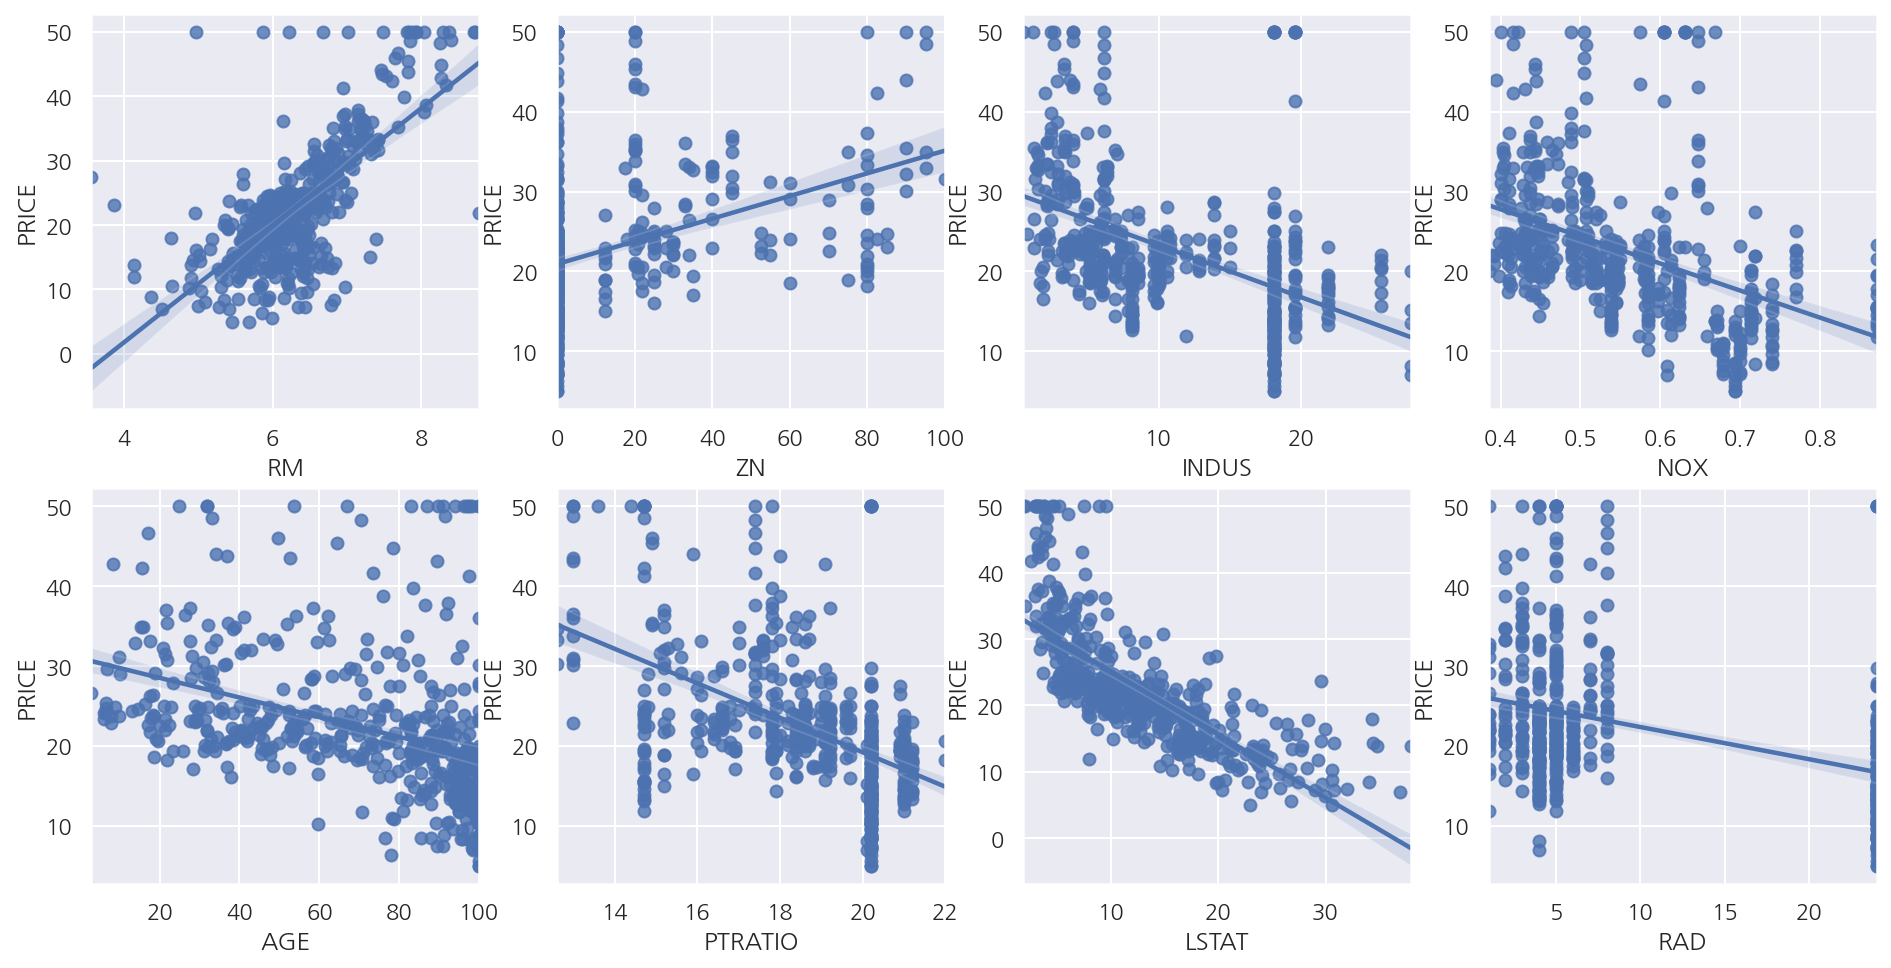

In [4]:
fig, axs = plt.subplots(2,4, figsize=(16,8))

lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # sns.regplot
    sns.regplot(x = feature, y = "PRICE", data = boston_df, ax = axs[row,col])

- 일부 독립변수에 대해 산점도 및 회귀선을 확인하면 RM, LSTAT등이 PRICE와 선형 관계가 있어 보인다.

**선형 회귀 학습/예측/평가**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS 학습/예측/평가
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.3f}, RMSE: {rmse:.3f}")
print(f"Variance score: {r2:.3f}")

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


**회귀 계수**

In [6]:
coef = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coef.loc["intercept"] = np.round(lr.intercept_, 1)
coef.sort_values(ascending = False)

intercept    41.0
RM            3.4
CHAS          3.0
RAD           0.4
ZN            0.1
B             0.0
TAX          -0.0
AGE           0.0
INDUS         0.0
CRIM         -0.1
LSTAT        -0.6
PTRATIO      -0.9
DIS          -1.7
NOX         -19.8
dtype: float64

**교차 검증**

In [7]:
from sklearn.model_selection import cross_val_score

X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

lr = LinearRegression()

# cross_val_score
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt( -1 * neg_mse_scores )
avg_rmse = np.mean(rmse_scores)

print(f'5 folds의 개별 Negative MSE scores: {np.round(neg_mse_scores,2)}')
print(f'5 folds의 개별 RMSE scores: {np.round(rmse_scores,2)}')
print(f'5 folds의 평균 RMSE: {avg_rmse:.3f}')

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


# 2. 다항 회귀와 과적합/과소적합

**다항 회귀**

In [8]:
from sklearn.preprocessing import PolynomialFeatures

x = np.array([1,2,3,4]).reshape(2,2)

# 2차 다항식 계수
poly2 = PolynomialFeatures(degree=2)
poly2.fit(x)
poly_ftr_2 = poly2.transform(x)

# 3차 다항식 계수
poly3 = PolynomialFeatures(degree=3)
poly_ftr_3 = poly3.fit_transform(x)

print(f"2차 다항식 계수")
print(poly_ftr_2)
print(f"3차 다항식 계수")
print(poly_ftr_3)

2차 다항식 계수
[[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]]
3차 다항식 계수
[[ 1.  1.  2.  1.  2.  4.  1.  2.  4.  8.]
 [ 1.  3.  4.  9. 12. 16. 27. 36. 48. 64.]]


- `PolynomialFeatures`를 이용하여 다항식 계수를 생성 가능하다.


- 2차 다항식 변환 형태는 $[x_{1}, x_{2}] \rightarrow [1, x_{1}, x_{2}, x_{1}^2, x_{1}x_{2}, x_{2}^2]$이다.


- 3차 다항식 변환 형태는 $[x_{1}, x_{2}] \rightarrow [1, x_{1}, x_{2}, x_{1}^2, x_{1}x_{2}, x_{2}^2, x_{1}^3, x_{1}^2 x_{2}, x_{1} x_{2}^2, x_{2}^3]$이다.

In [9]:
from sklearn.pipeline import Pipeline

# y = 1 + 2X_1 + 3X_1^2 + 4X_2^3 데이터 생성
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(-2,2)
y = polynomial_func(X)

# Pipeline으로 Polynomial변환, Linear Regression 연결
model = Pipeline( [('poly', PolynomialFeatures(3)),
                   ('linear', LinearRegression())] )

model = model.fit(X, y)
print('Polynomial 절편')
print(np.round(model.named_steps.linear.intercept_, 2))
print('Polynomial 회귀 계수')
print(np.round(model.named_steps.linear.coef_, 2))

Polynomial 절편
1.76
Polynomial 회귀 계수
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


- 원 데이터는 $y = 1 + 2x_{1} + 3x_{1}^2 + 4x_{2}^3$를 따르게 생성하였다.


- 추정 회귀식은 $ \hat{y} = 1.76 + 0.18x_{1} + 0.18x_{2} + 0.36x_{1}^2 + 0.54x_{1}x_{2} + 0.72x_{2}^2 + 0.72x_{1}^3 + 1.08x_{1}^2 x_{2} + 1.62x_{1} x_{2}^2 + 2.34x_{2}^3$으로 계산되었다.


- 차이는 크지만 이 예제는 `Pipeline`등을 이용해 다항 회귀 적합이 가능하다는 것만 확인하자.

**과적합/과소적합**

In [10]:
# X: 0 ~ 1값의 30개 랜덤샘플
np.random.seed(0)
n = 30
X = np.sort(np.random.rand(n))

# cosine 값 함수
def make_y(X):
    y = np.cos(1.5 * np.pi * X)
    return y

# y: cosine 값 + Noise
noise = np.random.randn(n)*0.1
y = make_y(X) + noise


Degree=1 회귀 계수는 [-1.61] 입니다.
Degree=1 MSE 는 0.41 입니다.

Degree=4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree=4 MSE 는 0.04 입니다.

Degree=15 회귀 계수는 [-2.98293000e+03  1.03899340e+05 -1.87416086e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다.
Degree=15 MSE 는 182594790.08 입니다.


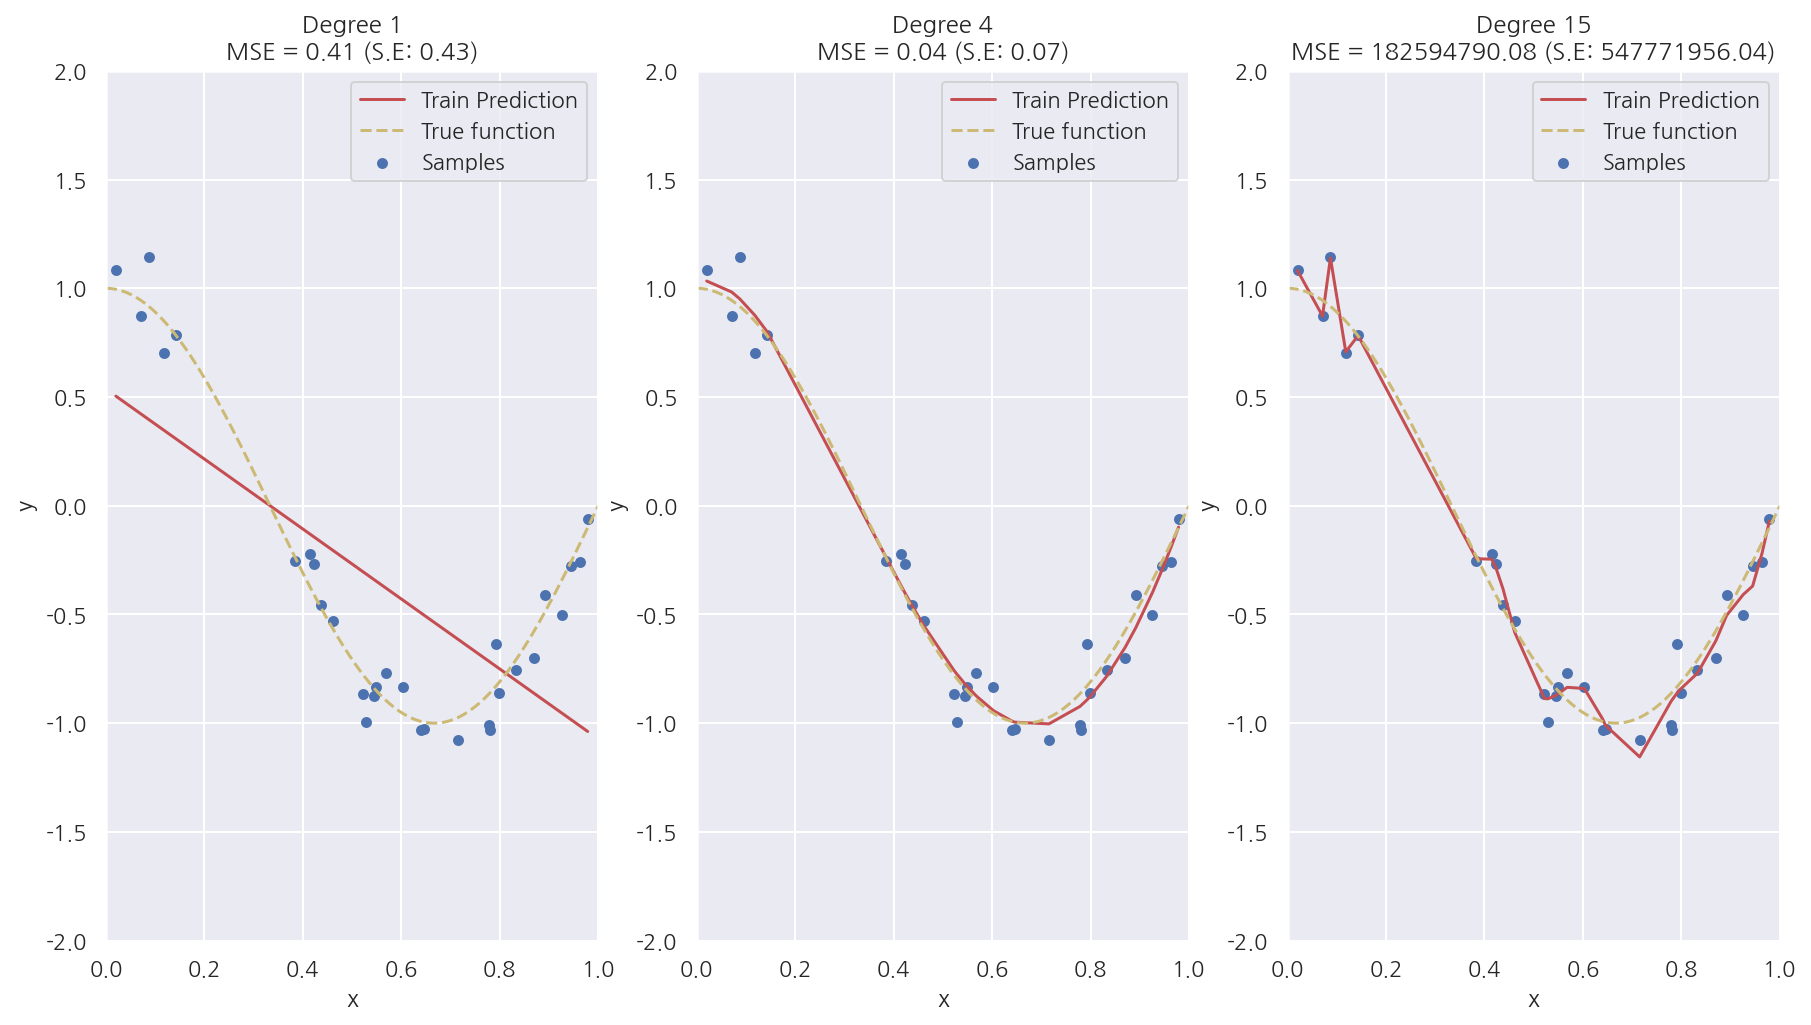

In [11]:
fig, axs = plt.subplots(1,3, figsize=(15,8))

degrees = [1, 4, 15]

# 다항 회귀 차수별 비교
for i, degree in enumerate(degrees):
    # plt.setp(axs[i], xticks=(), yticks=())
    
    # degree별 다항식 학습
    poly_features = PolynomialFeatures(degree = degree, include_bias=False)
    lr = LinearRegression()
    
    model = Pipeline([("polynomial_features", poly_features),
                         ("linear_regression", lr)])
    model.fit(X.reshape(-1, 1), y)
    
    # 교차 검증
    mse_scores = cross_val_score(model, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    coefficients = model.named_steps['linear_regression'].coef_
    mse = -np.mean(mse_scores)
    
    print(f'\nDegree={degree} 회귀 계수는 {np.round(coefficients,2)} 입니다.')
    print(f'Degree={degree} MSE 는 {mse:.2f} 입니다.')
    
    # 적합된 회귀식으로 test 데이터에 대해 예측 곡선, 실제 곡선 비교
    X_test = np.linspace(0, 1, 100).reshape(-1,1)
    y_test = make_y(X_test)
    y_pred = model.predict(X_test)
    
    # 학습 예측값
    axs[i].plot(X, model.predict(X.reshape(-1,1)), "r", label = "Train Prediction")
    
    # test 예측값
    # axs[i].plot(X_test, y_pred, "r", label = "Test Prediction")
    
    # 실제값
    axs[i].plot(X_test, y_test, 'y--', label = "True function") # Noise: X
    axs[i].scatter(X, y, edgecolor='b', s=20, label = "Samples") # Noise: O
    
    # 기타 설정
    axs[i].set_xlabel("x"); axs[i].set_ylabel("y")
    axs[i].set_xlim((0, 1)); axs[i].set_ylim((-2, 2))
    axs[i].legend(loc="best")
    axs[i].set_title(f"Degree {degree}\nMSE = {mse:.2f} (S.E: {mse_scores.std():.2f})")

plt.show()

- Degree 1은 단순 선형 회귀로서 실제 코사인 데이터를 예측하기에는 단순하여 패턴을 잘 파악하지 못한 과소적합 모델이다. MSE는 0.41이다.


- Degree 4는 예측 곡선이 실제 곡선과 매우 유사하며 MSE는 0.04로 가장 작다.


- Degree 15는 학습 데이터에 과적합하여 학습 데이터는 잘 예측하지만 새로운 데이터는 잘 예측하지 못한다. MSE가 압도적으로 높게 나타났다.


- 위 코드에서 Train Prediction이 아닌 Test Prediction으로 그래프를 그리면 Degree 15는 완전히 다른 형태로 나타난다.

# 3. 규제 선형 모델

규제 선형 모델은 선형회귀 계수에 대한 제약 조건(패널티)을 추가함으로써 과최적화를 막는 방법이다.

모형이 과도하게 최적화되면 모형 계수의 크기도 과도하게 증가하는 경향이 나타난다. 

따라서 규제 선형 모델에서 추가하는 제약 조건은 일반적으로 계수의 크기를 제한하는 방법이다.

## 3.1 Ridge 회귀

Ridge 회귀모형에서는 가중치(회귀계수)들의 제곱합을 최소화하는 것을 추가적인 제약 조건(L2 규제)으로 한다.

$$
\beta = \text{arg}\min_\beta \left( \sum_{i=1}^n e_i^2 + \lambda \sum_{j=1}^k \beta_j^2 \right)
$$

$\lambda$는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다. $\lambda$가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다. $\lambda$가 작아지면 정규화 정도가 작아지며 $\lambda$ 가 0이 되면 일반적인 선형 회귀모형이 된다.

In [12]:
from sklearn.linear_model import Ridge

# boston data
boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target

X_data = boston_df.iloc[:,:-1]
y_target = boston_df.iloc[:,-1]

# Ridge 회귀 (alpha = 10)
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(f'5 folds의 개별 Negative MSE scores: {np.round(neg_mse_scores,2)}')
print(f'5 folds의 개별 RMSE scores: {np.round(rmse_scores,2)}')
print(f'5 folds의 평균 RMSE: {avg_rmse:.3f}')

5 folds의 개별 Negative MSE scores: [-11.42 -24.29 -28.14 -74.6  -28.52]
5 folds의 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5 folds의 평균 RMSE: 5.518


- 앞서 규제가 없는 LinearRegresiion의 RMS: 5.829보다 낮은 5.518로 더 띄어난 예측 성능을 보여준다.

**하이퍼 파라미터별 성능**

In [13]:
alphas = [0, 0.1, 1, 10, 100]

for a in alphas:
    ridge = Ridge(alpha = a)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print(f"alpha: {a} 일 때 5 folds의 평균 RMSE: {avg_rmse:.3f}")

alpha: 0 일 때 5 folds의 평균 RMSE: 5.829
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha: 1 일 때 5 folds의 평균 RMSE: 5.653
alpha: 10 일 때 5 folds의 평균 RMSE: 5.518
alpha: 100 일 때 5 folds의 평균 RMSE: 5.330


- alpha는 100 일 때 평균 RMSE: 5.330으로 가장 좋게 나타났다.

**하이퍼 파라미터별 회귀계수**

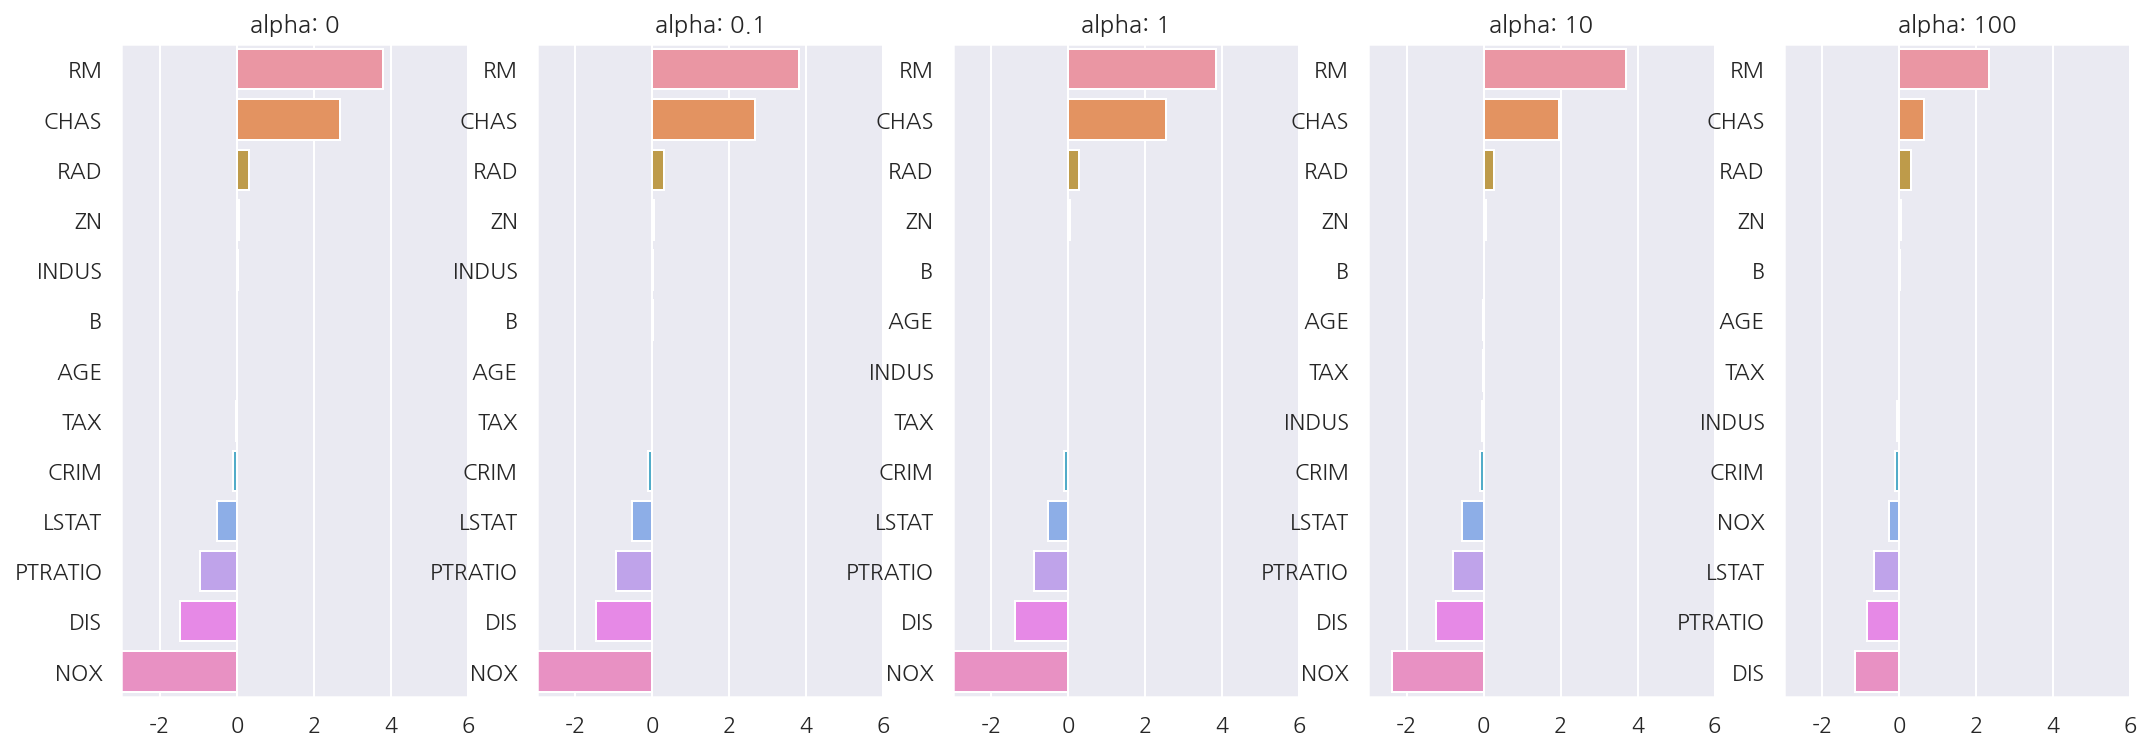

In [14]:
fig, axs = plt.subplots(1,5, figsize=(18,6))

alphas = [0, 0.1, 1, 10, 100]
coefficients = pd.DataFrame()

for i, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    
    # 회귀 계수 데이터프레임
    coef_series = pd.Series(data = ridge.coef_, index = X_data.columns)
    coefficients[f"alpha: {alpha}"] = coef_series
    
    # 회귀 계수 plot
    coef_series = coef_series.sort_values(ascending=False)
    sns.barplot(x = coef_series.values, y = coef_series.index, ax = axs[i])
    
    axs[i].set_title(f"alpha: {alpha}")
    axs[i].set_xlim(-3,6)
    
    # x축에 계수 라벨 넣기
    # coef_label = round(coefficients,2).iloc[:,i]
    # xlabel = "\n".join(str(coef_label).split("\n")[:-1])
    # axs[i].set_xlabel(xlabel)

plt.show()

In [15]:
coefficients

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
NOX,-17.766611,-16.684645,-10.777015,-2.371619,-0.262847
RM,3.809865,3.818233,3.854000,3.702272,2.334536
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
DIS,-1.475567,-1.459626,-1.372654,-1.248808,-1.153390
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856


- 하이퍼 파라미터가 증가함에 따라 회귀 계수 값이 점점 작아짐을 알 수 있다.


- 하지만 Ridge는 뒤에 나올 Lasso와는 다르게 회귀 계수를 0으로 만들진 않는다.

## 3.2 Lasso 회귀

Lasso 회귀모형은 가중치(회귀계수)의 절대값의 합을 최소화하는 것을 추가적인 제약 조건(L1 규제)으로 한다.

$$
\beta = \text{arg}\min_\beta \left( \sum_{i=1}^n e_i^2 + \lambda \sum_{j=1}^k | \beta_j | \right)
$$

**모델/하이퍼 파라미터별 교차 검증, 회귀 계수 데이터 프레임**

In [16]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, hyper_params=None, X_data=None, y_target=None, 
                        verbose=True, return_coef=True):
    
    coefficients = pd.DataFrame()
    
    # 메시지 출력
    if verbose:
        print(f"##### {model_name} #####")
        
    for param in hyper_params:
        # 모델 설정
        if model_name == "Ridge": model = Ridge(alpha = param)
        elif model_name == "Lasso": model = Lasso(alpha = param)
        elif model_name == "ElasticNet": model = ElasticNet(alpha = param, l1_ratio = 0.7)
        
        # 교차 검증
        neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        print(f"alpha: {param} 일 때 5 folds의 평균 RMSE: {avg_rmse:.3f}")
        
        # 회귀 계수
        model.fit(X_data, y_target)
        
        if return_coef == True:
            coef_series = pd.Series(data = model.coef_, index = X_data.columns)
            coefficients[f"alpha: {param}"] = coef_series
            
    return coefficients

In [17]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
lasso_coef = get_linear_reg_eval("Lasso", hyper_params=lasso_alphas, X_data=X_data, y_target=y_target)

##### Lasso #####
alpha: 0.07 일 때 5 folds의 평균 RMSE: 5.612
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.615
alpha: 0.5 일 때 5 folds의 평균 RMSE: 5.669
alpha: 1 일 때 5 folds의 평균 RMSE: 5.776
alpha: 3 일 때 5 folds의 평균 RMSE: 6.189


- alpha는 0.07 일 때 평균 RMSE: 5.612로 가장 좋으며 Ridge보다는 약간 높게 LinearRegression보다는 낮게 나타났다.

In [18]:
lasso_coef

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


- 하이퍼 파라미터가 증가함에 따라 회귀 계수 값이 점점 작아짐을 알 수 있다.


- Ridge와 다르게 하이퍼 파라미터가 증가함에 따라 회귀 계수를 0으로 만들어 피처 선택 기능이 있다.

## 3.3 Elastic Net 회귀모형

Elastic Net 회귀모형은 가중치(회귀계수)의 절대값의 합과 제곱합을 동시에 제약 조건(L2, L1 규제 결합)으로 가지는 모형이다.

$$
\beta = \text{arg}\min_\beta \left( \sum_{i=1}^n e_i^2 + \lambda_1 \sum_{j=1}^k | \beta_j | + \lambda_2 \sum_{j=1}^k \beta_j^2 \right)
$$

$\lambda_1$, $\lambda_2$ 두 개의 하이퍼 모수를 가진다.

In [19]:
# l1_ratio는 0.7로 고정
elasitic_alphas = [0.07, 0.1, 0.5, 1, 3]
elasitic_coef = get_linear_reg_eval("ElasticNet", hyper_params=elasitic_alphas, X_data=X_data, y_target=y_target)

##### ElasticNet #####
alpha: 0.07 일 때 5 folds의 평균 RMSE: 5.542
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.526
alpha: 0.5 일 때 5 folds의 평균 RMSE: 5.467
alpha: 1 일 때 5 folds의 평균 RMSE: 5.597
alpha: 3 일 때 5 folds의 평균 RMSE: 6.068


- alpha는 0.5 일 때 평균 RMSE: 5.467로 가장 좋다.

In [20]:
elasitic_coef

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


- Lasso에 비해 상대적으로 0이 되는 값이 적음을 알 수 있다.

# 4. 데이터 변환

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# 데이터 변환 함수
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [22]:
alphas = [0.1, 1, 10, 100]

# 피처 변환 리스트
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    
    get_linear_reg_eval("Ridge", hyper_params=alphas, X_data=X_data, y_target=y_target)


## 변환 유형:None, Polynomial Degree:None
##### Ridge #####
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha: 1 일 때 5 folds의 평균 RMSE: 5.653
alpha: 10 일 때 5 folds의 평균 RMSE: 5.518
alpha: 100 일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:None
##### Ridge #####
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha: 1 일 때 5 folds의 평균 RMSE: 5.653
alpha: 10 일 때 5 folds의 평균 RMSE: 5.518
alpha: 100 일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형:Standard, Polynomial Degree:2
##### Ridge #####
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha: 1 일 때 5 folds의 평균 RMSE: 5.653
alpha: 10 일 때 5 folds의 평균 RMSE: 5.518
alpha: 100 일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형:MinMax, Polynomial Degree:None
##### Ridge #####
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha: 1 일 때 5 folds의 평균 RMSE: 5.653
alpha: 10 일 때 5 folds의 평균 RMSE: 5.518
alpha: 100 일 때 5 folds의 평균 RMSE: 5.330

## 변환 유형:MinMax, Polynomial Degree:2
##### Ridge #####
alpha: 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha: 1 일 때 5 folds의 평균 RMSE: 5.653
alpha: 10 일 때 5 folds

- 피처 스케일링, 다항식, 하이퍼 파라미터별 Ridge 성능을 평가하였다.


- boston은 피처가 모두 float형이므로 다른 데이터라면 스케일링 등에 대해 다르게 함수를 생성해야한다.


- 데이터 사이언스 스쿨 내용을 공부하면서 많이 확인한 것이라 자세한 설명은 넘어간다.